# ITCS 4156 - Programming Assignment 3 -  Neural Networks

<font color="blue"> James Cowell - 801101165 </font>

**Note**: Doing *restart and run all* will execute all cells in this notebook without an error and should give you a minimum score of 32/80 by default.

# Instructions


## Overview

In this programming assignment, we will revist the **regression** problem from **assignment-1** and the **classification** problem from **assignment-2**, but now from the perspective of a neural networks. We will be using the same datsets as before and will be measuring the performance of neural networks on them. 

There are three python files accompaning this assignment:
1. SingleLayerNetwork.py
2. NNRegressor.py
3. NNClassifier.py

We will being with implementing a neural network class in SingleLayerNetwork.py. Next, we will use the SingleLayerNework class in NNRegression.py to peform regression and NNClassifier.py to perform classificaion respecively. This will be achieved based on how we initialize our network and training parameters.

If you are feeling lost already, don't worry the accompanying instrucions below and in the python files should clarify things more.



## Important Notes

- The function of transform() method here is not strictly same as the transform method in regression. You are not just adding more degrees to your features. Here it means whatever you think is a necessary manupulation of data that is needed before it can be used for prediction.

- You are free to create your own class variables in __init__ method. Additionally, you can also define your own functions inside each class. For example if, I were to write a function to add bias feature then I would need to call it from fit_tranform and transform both. 

- Even though scikit-learn is available during evaluation, you should be implementing your own algorithms instead of using the library. This will be reviewed before the final grading. Please feel free to import any python, numpy, pandas modules. 

- For analysis, you can use any library you want in the notebook. However matplolib, seaborn etc will be unavailable in the evaluation environment if used in the python files.

- **Epochs (number of iterations of data)**: While training your models locally, you can kepp this number as high as you want. But please keep in mind, that for evaluation your job will have a maximum of **10 minutes** to finish training and prediction for all the three algorithms. So tune this parameter, keeping this information in mind.  

- **Plagiarism Detection**: While we encourage peer discussion for understanding concepts etc, code sharing is strictly prohibited. Therefore, a plagiarism detection software will analyze everyone's code to check for similarities.


In [1]:
# This ensures that whenever you make edits in your code files, your changes will get reflected 
# in this notebook as soon you run the cell which imports the method/class from the said code file.

%load_ext autoreload
%autoreload 2

In [2]:
#imports 

import matplotlib.pyplot as plt
import numpy as np
import random
import inspect

In [3]:
# setting random seed for reproducible results

np.random.seed(25)
random.seed(25)

# 1. Neural Network Implementation

A Neural Nework layers are usually referred by the following names:
- Input Layer -> As the name suggests, this is he first layer of the network that receives input.
- Output Layer -> The final layer or the last layer of the nework.
- Hidden Layer -> The intermediate layers between the input layer and output layer.

For this assignment, we will be implementing a neural network with one hidden layer like the one shown below:
<img src="http://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/nn.png" width=500/>

In the above figure:
- $x_1, x_2, ... x_n$ along with bias term forms the input layer. This layer has no weights.

- The weights $V$ and the activation function $h$ forms the hidden layer. $z_1, z_2, ... z_n$ are the outputs of the hidden layer.

- $z_1, z_2, ... z_n$ along with bias term forms  the input to the final layer. Here $W$ are the weighs of this layer. In the depiced figure, the network doesn't have an activation funcion in the output layer. In the case of multi-class classification, the final layer usually has a softmax as the activation function.

###  ====  TODO - 1 ====

- Our first task is to implement a neural network. 

- Open the **SingleLayerNetwork.py** and read through docstring of all the functions one by one. The **TODO** tags in each function explains what is expected out of each method. 

- Our goal is to dynamically create a neural network with **a single hidden layer** and our choice of number of neurons (units) in each layer and our choice of activation functions in the hidden and the output layer.

In [4]:
"""
Note:   
Since we are just building our network in this task and not using it yet, 
it is likely that there will be some errors in your implementation. But don't worry, 
you will be able to catch them once we finally use our network in the following tasks.

"""

"\nNote:   \nSince we are just building our network in this task and not using it yet, \nit is likely that there will be some errors in your implementation. But don't worry, \nyou will be able to catch them once we finally use our network in the following tasks.\n\n"

# 2.1. Regression with a Neural Network

In this section, we return to our problem of predicting housing prices. We will make use of our SingleLayerNetwork for this problem.

## 2.1 Dataset

Let's download and load our dataset.

In [5]:
from itcs4156.datasets.HousingDataset import HousingDataset
dataset = HousingDataset()

Skipping download. File already exists: c:\users\michael cowell\school projects\itcs-4156\programming-assignments\itcs4156\datasets\data\housing.train

Skipping download. File already exists: c:\users\michael cowell\school projects\itcs-4156\programming-assignments\itcs4156\datasets\data\housing.val

Skipping download. File already exists: c:\users\michael cowell\school projects\itcs-4156\programming-assignments\itcs4156\datasets\data\housing.names



In [6]:
with open(dataset.data["paths"]["names"], 'r') as rf:
    print(rf.read())

1. Title: Housing Data

2. Concerns housing values in suburbs of Boston.

3. Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

4. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B     

In [7]:
# This loads our training and validation dataset into two pandas dataframes
df_train, df_val = dataset.load()

In [8]:
df_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01360,75.0,4.00,0,0.410,5.888,47.6,7.3197,3,469.0,21.1,396.90,14.80,18.9
1,0.77299,0.0,8.14,0,0.538,6.495,94.4,4.4547,4,307.0,21.0,387.94,12.80,18.4
2,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666.0,20.2,2.52,23.29,13.4
3,0.20608,22.0,5.86,0,0.431,5.593,76.5,7.9549,7,330.0,19.1,372.49,12.50,17.6
4,0.10084,0.0,10.01,0,0.547,6.715,81.6,2.6775,6,432.0,17.8,395.59,10.16,22.8


## 2.2 Visualize

In [9]:
from pandas.plotting import scatter_matrix

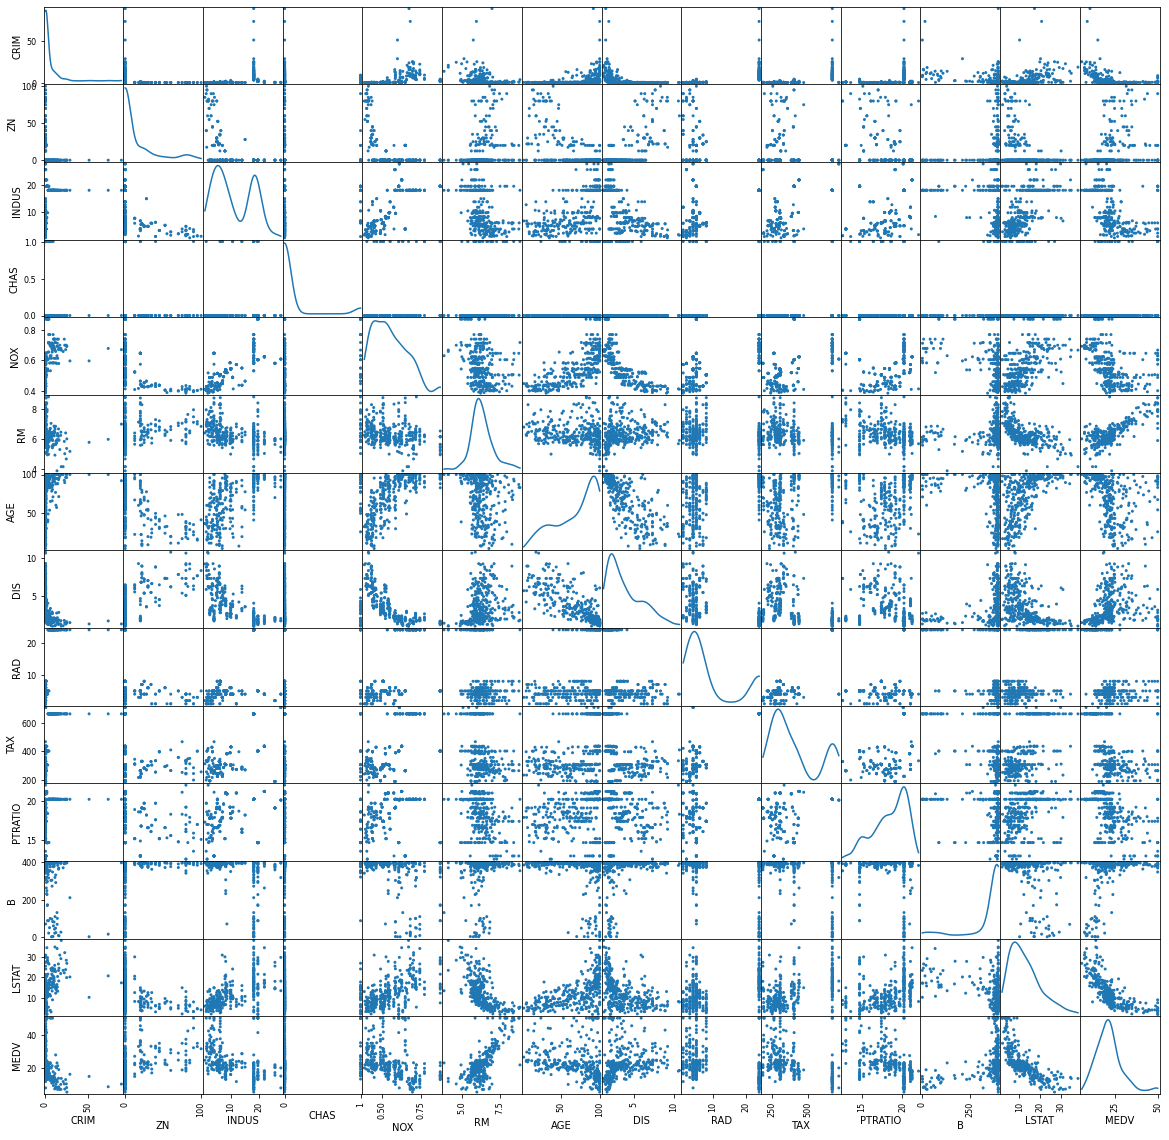

In [10]:
scatter_matrix(df_train, alpha=1, grid=True, figsize=(20,20), diagonal='kde');

The last row in the above figure plots each feature against our target variable "MEDV" i.e, house prices. 
The diagonal represents the distribution of values in each column (feature) in our training dataset. The rest of the plots can help us understand any corelation between different feature columns.

## 2.3 Create Input & Target

Here we just create numpy array of inputs and target from our training and validation dataframes.

In [11]:
from itcs4156.util.data import get_input_output

In [12]:
features = list(df_train.columns[:-1])
print(features)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [13]:
# By default all features will be present in our training and validation data.

X_tr, Y_tr = get_input_output(df_train, in_features=features, out_feature="MEDV")
X_val, Y_val = get_input_output(df_val, in_features=features, out_feature="MEDV")

In [14]:
print("Input Shape: ", X_tr.shape)
print("Target Shape: ", Y_tr.shape)

Input Shape:  (323, 13)
Target Shape:  (323, 1)


## 2.4 Utility Functions

This section defines helper functions to visualize and evaluate our performance. Feel free to read through them.

In [15]:
from itcs4156.util.metrics import mean_sq_error

def evaluate(model, X_tr, Y_tr, X_val, Y_val):
    P_tr = model.predict(X_tr)
    P_val = model.predict(X_val)
    mse_tr = mean_sq_error(Y_tr, P_tr)
    mse_val = mean_sq_error(Y_val, P_val)
    
    print("Train MSE: ", mse_tr)
    print("Val MSE: ", mse_val)


In [16]:
def plot_true_vs_predicted(Y, pred):
    y1 = min(Y)
    y2 = max(Y)
    plt.scatter(Y, pred, label="True vs Predicted", color='b', marker='*')
    plt.xlabel("True House Price")
    plt.ylabel("Predicted House Price")
    plt.ylim(y1, y2)
    plt.xlim(y1, y2)
    I = np.arange(y1,y2)
    plt.plot(I, I, label = "Line of Zero Error", color='r')
    plt.legend()

In [17]:
def plot_trace(trace, loss_f):
    plt.plot(trace)
    plt.legend(('Train','Val'))
    plt.xlabel("iterations")
    plt.ylabel(loss_f);

## 2.5 Code

### === TODO - 2  ===

- Open the **NNRegressor.py** file. We can see that this class inherits our SingleLayerNetwork.py. This means NNRegressor is auomatically a neual network and has all the functions we implemented in our SingleLayerNetwork class.
- Complete the fit_transform() and transform() methods to apply any feature selection / prepocessing of the data before we can use it for training.
- Finally, the train method is nothing but a call to the super class method which we have aleady implemented -- but just additionally includes calls to transformation functions.
- The last step is to implement the predict function.

In [18]:
from itcs4156.assignments.NeuralNetworks.NNRegressor import NNRegressor

In [19]:
# 1. Build your Neural Network

## TODO: Assign appropriate values to the following parameters to build a neural network model for regression.

num_input = None                
num_hidden = None
num_output = None
hidden_activation = None
output_activation = None

model = NNRegressor(n_i_f = num_input, 
                    n_h_f = num_hidden, 
                    n_o_f = num_output,
                    h_a = hidden_activation,
                    o_a = output_activation)

In [20]:
# 2. Start your training

## TODO: Set the following values train the neural network model for regression.

epochs = 0
lr_h = None
lr_o = None
loss_f = None

tr = model.train(X_tr, Y_tr, 
                 epochs, lr_h, lr_o, loss_f,
                 X_val, Y_val)

0it [00:00, ?it/s]


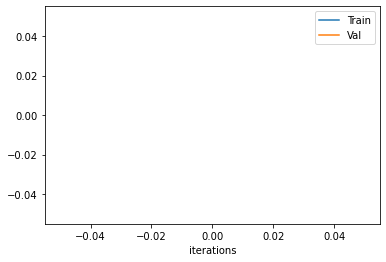

In [21]:
# 3. Trace the training performance VS number of epochs

plot_trace(tr, loss_f)

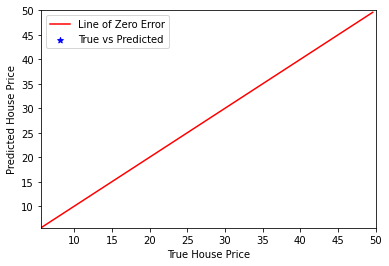

In [22]:
# 4. Visualizing training fit

plot_true_vs_predicted(Y_tr, model.predict(X_tr))

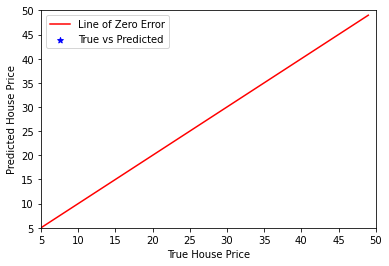

In [23]:
# 4. Visualizing validation fit

plot_true_vs_predicted(Y_val, model.predict(X_val))

In [24]:
# 5. Measure performance in numbers

evaluate(model, X_tr, Y_tr, X_val, Y_val)

Train MSE:  586.5626579437811
Val MSE:  569.3943658111267


In [25]:
# 6. TODO: Analysis 

"""
Question:
Explain the choice of your network parameters and training parameters and how it affects the performance. 

Answer:


"""

'\nQuestion:\nExplain the choice of your network parameters and training parameters and how it affects the performance. \n\nAnswer:\n\n\n'

# 3. Classification with Neural Networks

In this section, we return to our problem of digit classification on MNIST dataset, this time only by using a Neural Network.

## 3.1 Dataset

In [26]:
from itcs4156.datasets.MNISTDataset import MNISTDataset

In [27]:
dataset = MNISTDataset()

Skipping download. File already exists: c:\users\michael cowell\school projects\itcs-4156\programming-assignments\itcs4156\datasets\data\MNIST\train.zip

Unzipping: c:\users\michael cowell\school projects\itcs-4156\programming-assignments\itcs4156\datasets\data\MNIST\train.zip

Skipping download. File already exists: c:\users\michael cowell\school projects\itcs-4156\programming-assignments\itcs4156\datasets\data\MNIST\val.zip

Unzipping: c:\users\michael cowell\school projects\itcs-4156\programming-assignments\itcs4156\datasets\data\MNIST\val.zip



In [28]:
# This will take a minute.
# The load function returns training and validation data as tuples.

train_data, val_data = dataset.load()

Loading dataset..
Done!


In [29]:
X_tr, Y_tr = train_data
X_val, Y_val = val_data

In [30]:
# Lets checkout the shape of our data

print("Number of training examples:", X_tr.shape[0])
print("Number of validation examples: ", X_val.shape[0])
print("Number of features in each example: ", X_tr.shape[1])
print("Shape of target training labels: ", Y_tr.shape)
print("Shape of target validation labels: ", Y_val.shape)
print("Unique labels: ", np.unique(Y_tr))

Number of training examples: 44800
Number of validation examples:  11200
Number of features in each example:  784
Shape of target training labels:  (44800, 1)
Shape of target validation labels:  (11200, 1)
Unique labels:  [0 1 2 3 4 5 6 7 8 9]


## 3.2 Visualize

In [31]:
def display_classes(images, labels, shape=(28,28), num_samples=5):
    all_labels = np.unique(labels)
    n = len(all_labels) * num_samples
    cols = num_samples
    rows = int(n / cols) if n%cols == 0 else (n//cols + 1)
    fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4))
    plt.axis('off')
    for i, label in enumerate(all_labels):
        indexs = np.where(labels==label)[0]
        selected = np.random.choice(indexs, num_samples, replace=False)
        for j, idx in enumerate(selected):
            img = np.reshape(images[idx], shape)
            axs[i,j].imshow(img, cmap=plt.cm.gray)
            axs[i,j].axis('off')

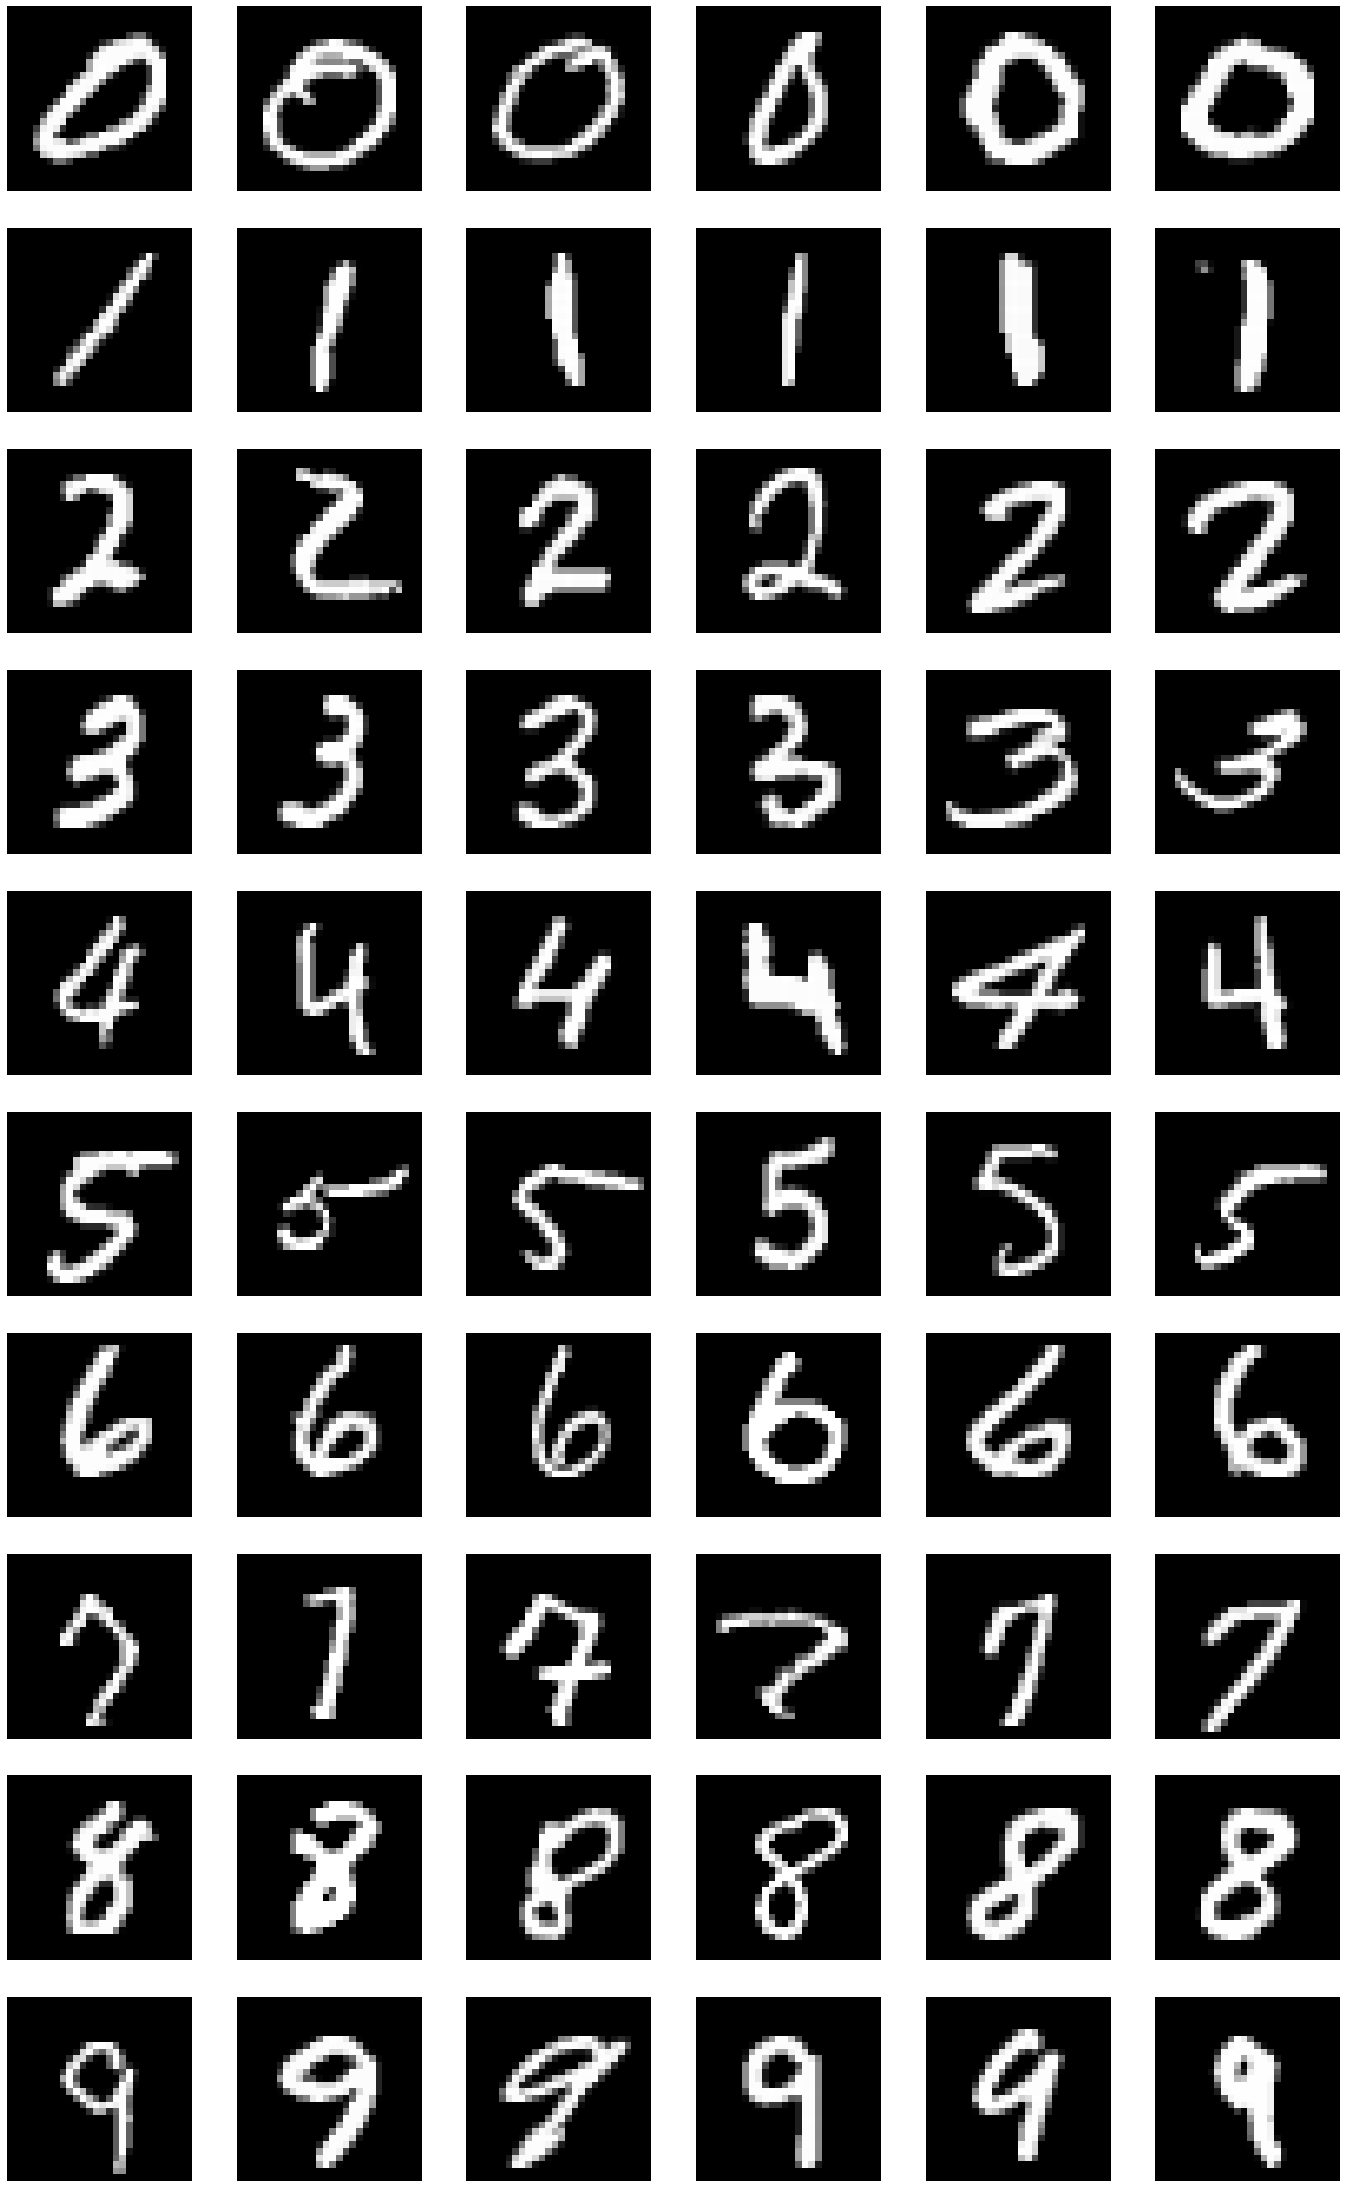

In [32]:
display_classes(X_tr, Y_tr, shape=(28,28), num_samples=6)

## 3.3 Utility Functions

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

def my_classification_report(targets, predictions):
    print(classification_report(targets, predictions))
    labels = np.unique(targets)
    cm = confusion_matrix(targets, predictions, labels=labels)
    df_cm = pd.DataFrame(cm, index=labels, columns = labels)
    c = 1.5
    k = len(labels) * c
    plt.figure(figsize=(k+c, k))
    sn.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    
    plt.show()

## 3.4 Code

### === TODO - 3 ===

- Open the **NNClassifier.py** file. We can see that this class also inherits our SingleLayerNetwork.py. 
- Complete the fit_transform() and transform() methods to apply any feature selection / prepocessing of the data before we can use it for training.
- Finally, the train method is nothing but a call to the super class method which we have aleady implemented -- but just additionally includes calls to transformation functions.
- The last step is to implement the predict method.

In [34]:
from itcs4156.assignments.NeuralNetworks.NNClassifier import NNClassifier

In [35]:
# 1. Build your Neural Network

## TODO: Assign appropriate values to the following parameters to build a neural network model for classification.

num_input = None
num_hidden = None
num_output = None
hidden_activation = None
output_activation = None

model = NNClassifier(n_i_f = num_input, 
                    n_h_f = num_hidden, 
                    n_o_f = num_output,
                    h_a = hidden_activation,
                    o_a = output_activation)

In [36]:
# 2. Start the training 

## TODO: Set the following values train the neural network model for classification.

epochs = 0
lr_h = None
lr_o = None
loss_f = None

tr = model.train(X_tr, Y_tr, 
                 epochs, lr_h, lr_o, loss_f,
                X_val, Y_val)

0it [00:00, ?it/s]


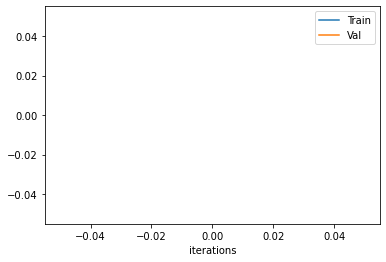

In [37]:
# 3. Trace the training performance VS number of epochs

plot_trace(tr, loss_f)

              precision    recall  f1-score   support

           0       0.10      0.10      0.10      4434
           1       0.11      0.10      0.11      5003
           2       0.10      0.10      0.10      4504
           3       0.11      0.11      0.11      4564
           4       0.10      0.10      0.10      4425
           5       0.09      0.10      0.10      4001
           6       0.10      0.10      0.10      4384
           7       0.11      0.10      0.10      4641
           8       0.10      0.10      0.10      4378
           9       0.09      0.09      0.09      4466

    accuracy                           0.10     44800
   macro avg       0.10      0.10      0.10     44800
weighted avg       0.10      0.10      0.10     44800



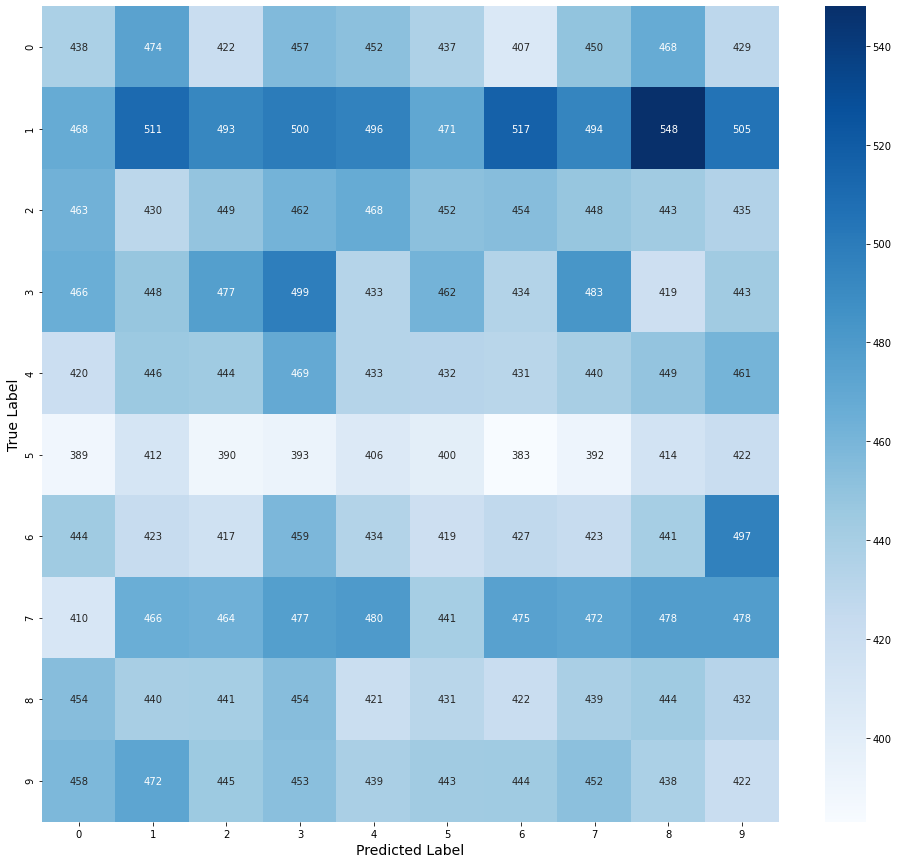

In [38]:
# 4. Final training Performance

Y_tr_pred = model.predict(X_tr)
my_classification_report(Y_tr, Y_tr_pred)

              precision    recall  f1-score   support

           0       0.10      0.10      0.10      4434
           1       0.11      0.10      0.11      5003
           2       0.10      0.10      0.10      4504
           3       0.11      0.11      0.11      4564
           4       0.10      0.10      0.10      4425
           5       0.09      0.10      0.10      4001
           6       0.10      0.10      0.10      4384
           7       0.11      0.10      0.10      4641
           8       0.10      0.10      0.10      4378
           9       0.09      0.09      0.09      4466

    accuracy                           0.10     44800
   macro avg       0.10      0.10      0.10     44800
weighted avg       0.10      0.10      0.10     44800



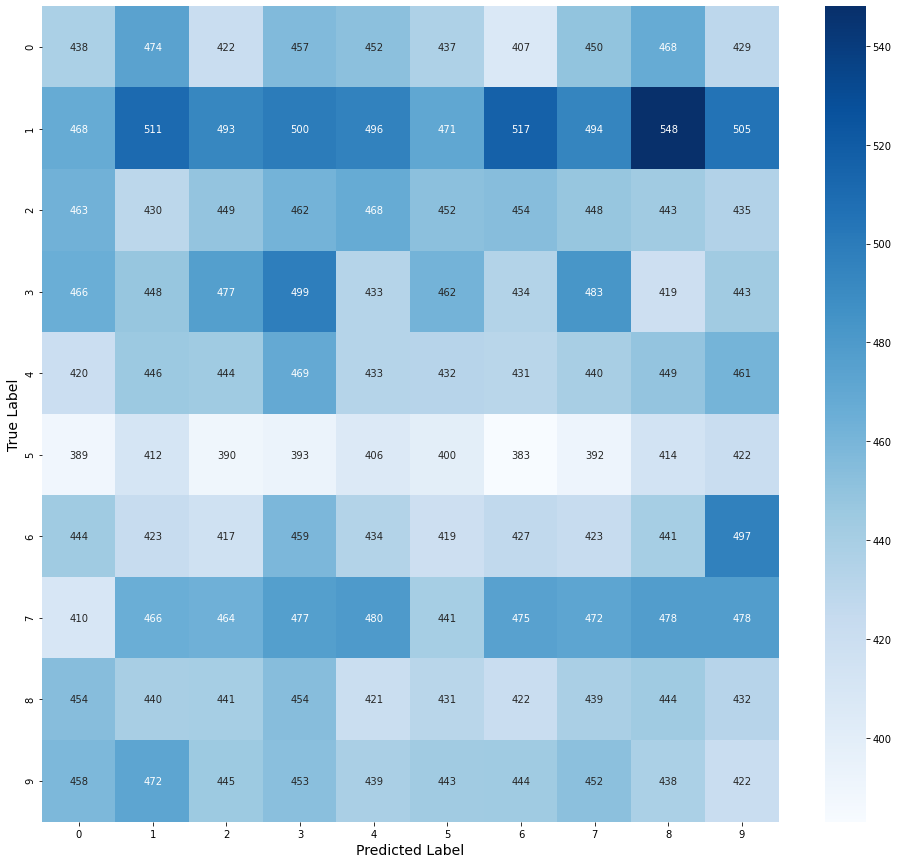

In [39]:
# 5. Final validation Performance

Y_val_pred = model.predict(X_val)
my_classification_report(Y_tr, Y_tr_pred)

In [40]:
# 6. TODO: Analysis 

"""
Question:
Explain the choice of your network parameters and training parameters and how it affects the performance. 

Answer:


"""

'\nQuestion:\nExplain the choice of your network parameters and training parameters and how it affects the performance. \n\nAnswer:\n\n\n'

# 4. Putting it all together!

Once you have finished all the above three **TODOs** and you are satisfied with the  results you are getting, it is time evaluate all your code together and make it ready for submission.

### ==== TODO - 4 ====

Open the **train.py** given with this assignment and set the appropriate parameters for your models in the given functions.

## Final Testing

Next, we will evaluate all your models on the validation split and give you a score based on the validation performance.

In [41]:
from itcs4156.assignments.NeuralNetworks.evaluate import eval
eval()

0it [00:00, ?it/s]

Setting Random Seed:  25
Skipping download. File already exists: c:\users\michael cowell\school projects\itcs-4156\programming-assignments\itcs4156\datasets\data\housing.train

Skipping download. File already exists: c:\users\michael cowell\school projects\itcs-4156\programming-assignments\itcs4156\datasets\data\housing.val

Skipping download. File already exists: c:\users\michael cowell\school projects\itcs-4156\programming-assignments\itcs4156\datasets\data\housing.names

==== Testing NNRegression ====

1. Building NN with Parameters: 
  Input Units: None, Hidden Units: None, Output Units: None, Hidden Activation: None, Output Activation: None
2. Training NN with Parameters: 
  Epochs: 0, lr_h: None, lr_o: None, loss_f: None
3. Evaluating Training Performance: 
 MSE = 588.2499250761873
4. Evaluating Validation Performance: 
 MSE = 568.9079170490727

Elapsed time: 0.0020 seconds
Score: 16.000000

Skipping download. File already exists: c:\users\michael cowell\school projects\itcs-4156

Skipping download. File already exists: c:\users\michael cowell\school projects\itcs-4156\programming-assignments\itcs4156\datasets\data\MNIST\val.zip

Unzipping: c:\users\michael cowell\school projects\itcs-4156\programming-assignments\itcs4156\datasets\data\MNIST\val.zip

Loading dataset..


0it [00:00, ?it/s]

Done!

==== Testing NNClassification ====

1. Building NN with Parameters: 
  Input Units: None, Hidden Units: None, Output Units: None, Hidden Activation: None, Output Activation: None
2. Training NN with Parameters: 
  Epochs: 0, lr_h: None, lr_o: None, loss_f: None
3. Evaluating Training Performance: 
 Accuracy = 0.09944196428571428
4. Evaluating Validation Performance: 
 Accuracy = 0.10330357142857143

Elapsed time: 0.0057 seconds
Score: 16.000000

Totals
Score: 32/80
Elapsed time: 33.4693 seconds


# Grading 


The final grading will be done on **TEST** dataset when you submit this assignment on **Autolab**. 

Points | Description
--|--------:
40 | NNRegression
40 | NNClassification
10 | Notebook: Analysis and Discussion
10 | $\frac{(N - R + 1)}{N} \times 10$   

The last 10 points will be calculated based on your rank (R) among all students (N). The rank will be computed based on your scores and accuracy. It will be visible to you (and anonymous to others) in leaderboard on Autolab as you make submissions.  

## Scoring scheme for NNRegression based on MSE

In [42]:
from itcs4156.assignments.NeuralNetworks.evaluate import score_regression
print(inspect.getsource(score_regression))

def score_regression(mse, max_score):
    thresh = 24.0
    if mse <= thresh:
        score_percent = 100
    elif mse is not None:
        score_percent = (thresh / mse) * 100
        if score_percent < 40:
            score_percent = 40
    else:
        score_percent = 40
    score = max_score * score_percent / 100.0
    return score



## Scoring scheme for NNClassification based on Accuracy

In [43]:
from itcs4156.assignments.NeuralNetworks.evaluate import score_classification
print(inspect.getsource(score_classification))

def score_classification(acc, max_score):
    score_percent = 0
    if acc >= 0.90:
        score_percent = 100
    elif acc >= 0.80:
        score_percent = 90
    elif acc >= 0.70:
        score_percent = 80
    elif acc >= 0.60:
        score_percent = 70
    elif acc >= 0.50:
        score_percent = 60
    elif acc >= 0.40:
        score_percent = 55
    elif acc >= 0.30:
        score_percent = 50
    elif acc >= 0.20:
        score_percent = 45
    else:
        score_percent = 40
    score = max_score * score_percent / 100.0 
    return score



# Submission


```
| - itcs4156
    | - assignments
        | - NeuralNetworks   <----------- Zip this folder and submit on AutoLab
            | - train.py
            | - SingleLayerNetwork.py
            | - NNRegressor.py
            | - NNClassifier.py
            | - evaluate.py
            | - __init__.py
    | - notebooks
        | - 3 - Neural Networks.ipynb <----- Upload this file on Canvas
```